<a href="https://colab.research.google.com/github/rajn5181/stock_market/blob/master/stock_market_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All important library import

In [1]:
import numpy as np
import pandas as pd
import sklearn as skt
%matplotlib inline
import math
import random
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import folium
import itertools
import scipy
import mplfinance as mpf
import yfinance as yf
from datetime import date
from keras.models import Sequential
from keras.layers import Dense,LSTM
import math
import pygal
from sklearn.preprocessing import  MinMaxScaler

In [2]:
#date=input("Enter the date")
#tic=input("Enter the stock name")
start_date='2020-03-20'
end_date=date.today()
data=yf.download(tickers='^NSEI',start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-20 00:00:00+05:30,8284.450195,8883.000000,8178.200195,8745.450195,8745.450195,1071500
1,2020-03-23 00:00:00+05:30,7945.700195,8159.250000,7583.600098,7610.250000,7610.250000,653500
2,2020-03-24 00:00:00+05:30,7848.299805,8036.950195,7511.100098,7801.049805,7801.049805,738400
3,2020-03-25 00:00:00+05:30,7735.149902,8376.750000,7714.750000,8317.849609,8317.849609,736900
4,2020-03-26 00:00:00+05:30,8451.000000,8749.049805,8304.900391,8641.450195,8641.450195,865600


Visualization of data

In [4]:
ma200=data.Close.rolling(200).mean()
ma100=data.Close.rolling(100).mean()

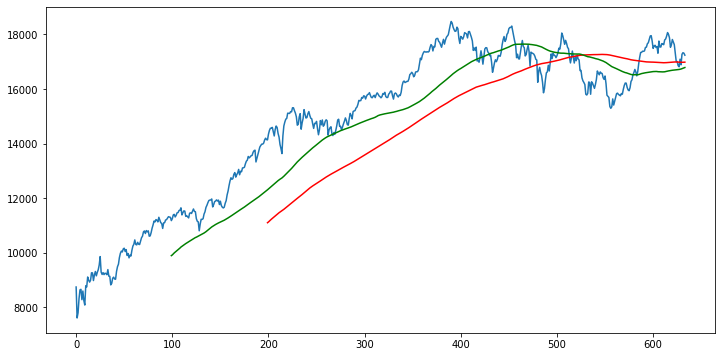

In [5]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')
plt.show()

Visualization of data in all time frame

In [6]:

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.update_xaxes(
    title_text='Date',
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label='1M',step='month',stepmode='backward'),
            dict(count=6,label='6M',step='month',stepmode='backward'),
            dict(count=1,label='YTD',step='year',stepmode='todate'),
            dict(count=1,label='1Y',step='year',stepmode='backward'),
            dict(step='all')

        ])
    )
)
fig.update_layout(
    title={
        'text':'Nifty Bank',
        'y':0.9,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'

    }
)
fig.show()

Volume chart visualizations

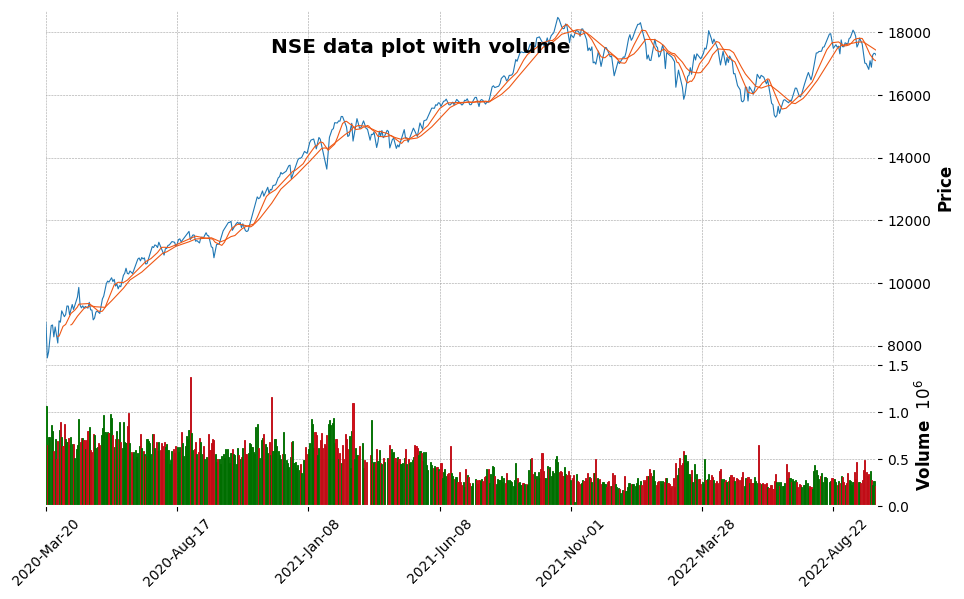

In [7]:
data.index=pd.DatetimeIndex(data['Date'])
mpf.plot(data, figratio=(10, 6), type="line", 
         mav=(10,20), volume=True,
         title = "NSE data plot with volume",
         tight_layout=True, style="charles")

Extract only top 100 row and plot

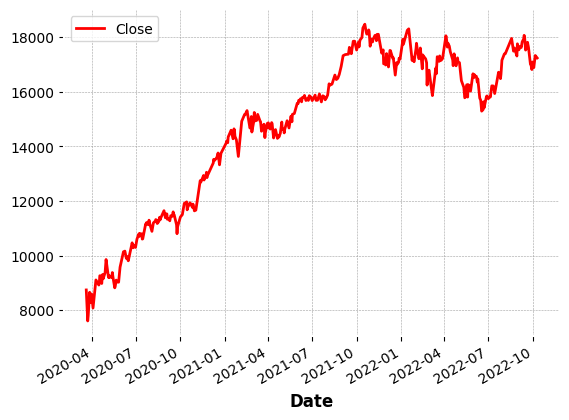

In [8]:
new_data=data.tail(1000)
new_data.plot('Date','Close',color='red')  # top last 1000 rows of close price of stock market
plt.show()

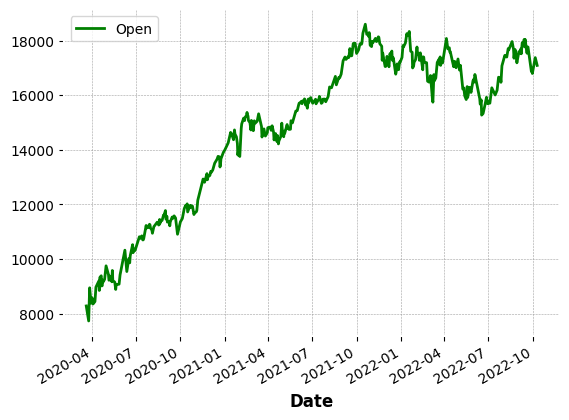

In [9]:
new_data.plot('Date','Open',color='green') # top last 1000 rows of open price of stock market
plt.show()

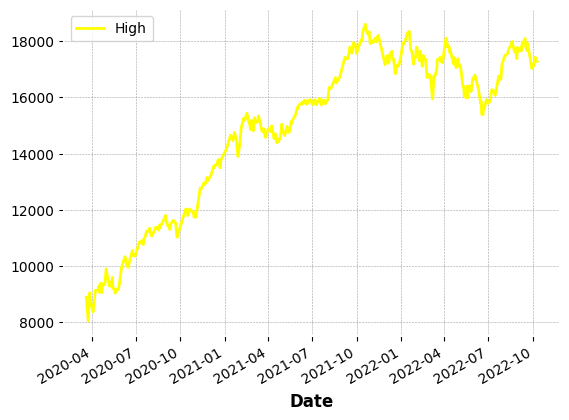

In [10]:
new_data.plot('Date','High',color='yellow') # top last 1000 rows of High price of stock market
plt.show()

<Figure size 2000x1200 with 0 Axes>

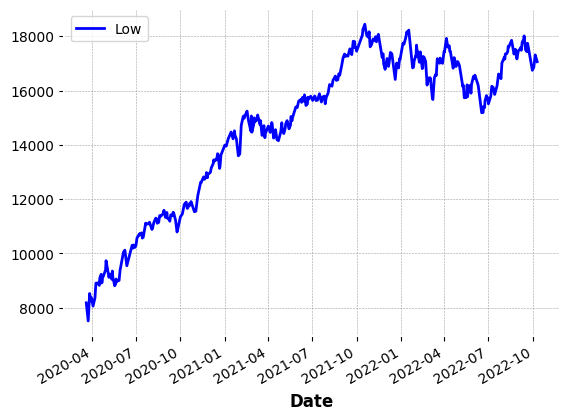

In [11]:
plt.figure(figsize=(20,12))
new_data.plot('Date','Low',color='blue')  # top last 1000 rows of Low price of stock market
plt.show() 

In [12]:
cols=[]                     #Select columns for data
for col in data.columns:   
    cols.append(col)
cols

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [13]:
df_open=[int(i) for i in data['Open']]
df_close=[int(i) for i in data['Close']]
df_high=[int(i) for i in data['High']]
df_low=[int(i) for i in data['Low']]

Plot different prices comparisions between open, high, low and close

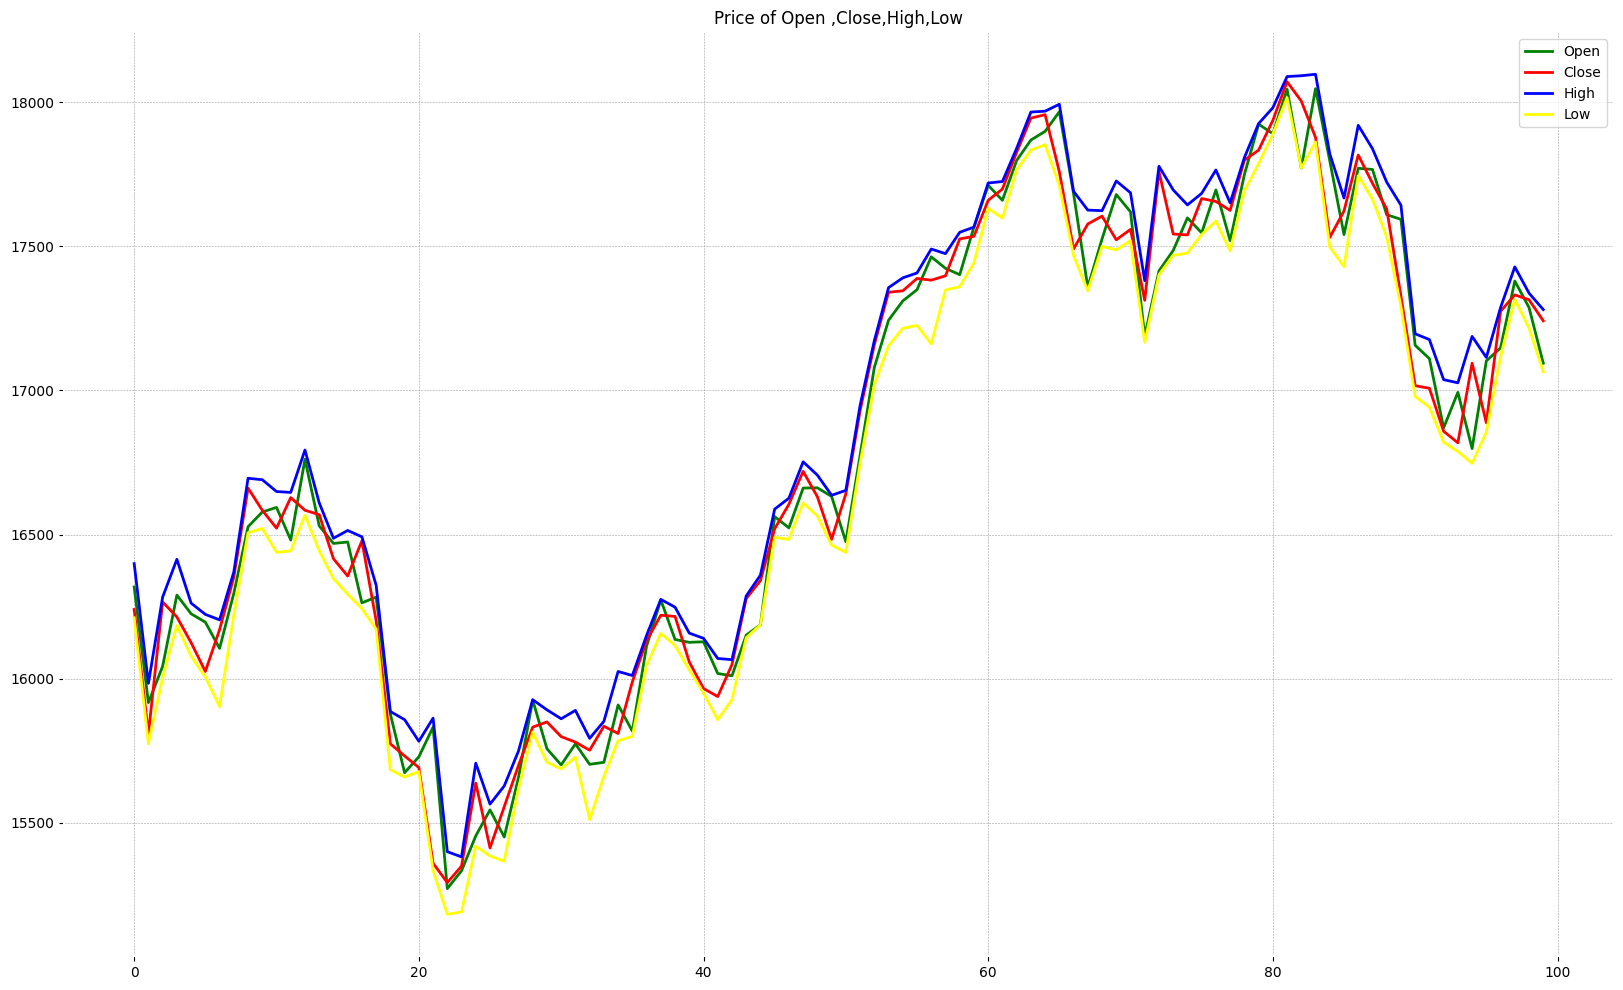

In [14]:
plt.figure(figsize=(20,12))
plt.plot(df_open[len(df_open)-100:],color='green')
plt.plot(df_close[len(df_close)-100:],color='red')
plt.plot(df_high[len(df_high)-100:],color='blue')
plt.plot(df_low[len(df_low)-100:],color='yellow')
plt.legend(['Open', 'Close','High','Low'])
plt.title('Price of Open ,Close,High,Low')
plt.show()

In [15]:
close_data = data.filter(['Close'])
dataset = close_data.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))


Building LSTM Model

In [16]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

Compiling the Model

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

384/384 [==============================] - 31s 41ms/step - loss: 0.0062


Testing the model on testing data

In [18]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Error Calculation

In [19]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(f"The Error in Algorithm Model:- {rmse/100}%")
print(f"The Accuracy of Model Predictions:- {100-rmse/100}%")

The Error in Algorithm Model:- 4.7412756921425485%
The Accuracy of Model Predictions:- 95.25872430785745%


Make Predictions

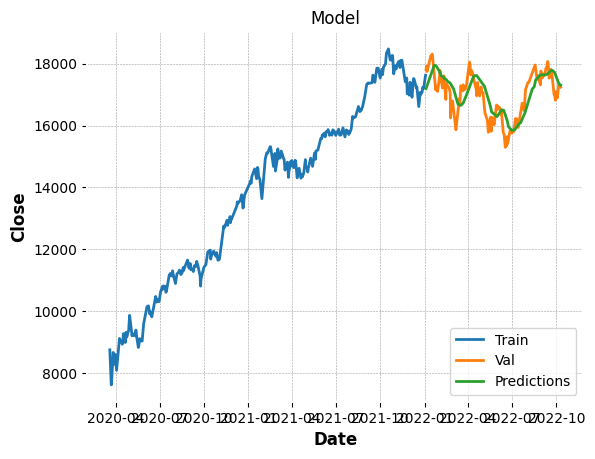

<Figure size 1000x500 with 0 Axes>

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
 
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.show()